In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FIG_W = 12
FIG_H_1ROW = 4.5
FIG_DPI = 300

save_dir = '...'
SAVE_FIG = True

In [3]:
correlation_hist_path_dict = {
    "dijet"     : 'path to hist_dijet.root',
    "dijet_part": 'path to hist_dijet_seg.root',

    "ZHbb"     : 'path to hist_ZHbb_boosted.root',
    "ZHbb_part": 'path to hist_ZHbb_boosted_seg.root',

    "ttbar"     : 'path to hist_ttbar.root',
    "ttbar_part": 'path to hist_ttbar_seg.root',
}

In [46]:
LABELS    = {'dijet': None, 'dijet_part': 'dijet', 'ttbar': None, 'ttbar_part': "$t\overline{t}$", 'ZHbb': None, 'ZHbb_part': "$Z(\\nu\\nu)H(b\overline{b})$"}
COLORS    = {'dijet': 'deeppink', 'dijet_part': 'deeppink', 'ttbar': 'forestgreen', 'ttbar_part': 'forestgreen', 'ZHbb': 'royalblue', 'ZHbb_part': 'royalblue'}
ALPHAS    = {'dijet': 1, 'dijet_part': 0.3, 'ttbar': 1, 'ttbar_part': 0.3, 'ZHbb': 1, 'ZHbb_part': 0.3}
HISTTYPES = {'dijet': 'step', 'dijet_part': 'stepfilled', 'ttbar': 'step', 'ttbar_part': 'stepfilled', 'ZHbb': 'step', 'ZHbb_part': 'stepfilled'}


In [47]:
def plot_hist(correlation_hist_path_dict, hist_name, xlabel, f_rebin=1, normalize=False, xlim=None, title=None):
    '''
        we drop the remainder of n_bins/f_rebin bins (last)
    '''
    
    fig = plt.figure(figsize=(FIG_W/2, FIG_H_1ROW), dpi=FIG_DPI)
    ax = fig.add_subplot(111)

    for i, (key, path) in enumerate(correlation_hist_path_dict.items()):
        print(key)
        file = uproot.open(path)
        print(file.keys())
        hist = file[hist_name]

        edges = hist.axis().edges()
        vals = hist.values()
        centers = (edges[:-1] + edges[1:]) / 2
        width = edges[1:] - edges[:-1]

        total_entries = int(vals.sum())

        # combine bins by a factor f_rebin
        n_vals_drop_last = (len(vals) // int(f_rebin)) * int(f_rebin)
        centers = centers[:n_vals_drop_last].reshape(-1, int(f_rebin)).mean(axis=1)
        width   = width[:n_vals_drop_last].reshape(-1, int(f_rebin)).sum(axis=1)
        vals    = vals[:n_vals_drop_last].reshape(-1, int(f_rebin)).sum(axis=1)
        edges   = np.concatenate([edges[:1], edges[int(f_rebin):-1:int(f_rebin)], edges[-1:]])

        if normalize:
            vals = vals / vals.sum()

        label = LABELS[key]
        ax.hist(centers, bins=edges, weights=vals, label=label, lw=1, histtype=HISTTYPES[key], alpha=ALPHAS[key], color=COLORS[key])
    
        # harcoded :(
        if i == 1:
            ax.hist([], bins=1, weights=[], label='Full event', lw=1, histtype='step', alpha=1, color='k')
        if i == 3:
            ax.hist([], bins=1, weights=[], label='Partitioned', lw=1, histtype='stepfilled', alpha=0.3, color='k')

    ax.set_xlabel(xlabel)
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, left=True, right=True)
    ax.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.5, zorder=0)

    ax.set_xlabel(xlabel)
    ax.set_ylabel("Normalized counts")
    
    ax.legend(ncol=3, loc='upper right', framealpha=1)
    
    ax.set_yscale('log')
    if title is not None:
        ax.set_title(title)

    if xlim is not None:
        ax.set_xlim(xlim)
    
    ax.set_ylim(1e-5, 1)

    return fig

# Topo to topo (no weighting)

dijet
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
dijet_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ZHbb
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ZHbb_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ttbar
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ttbar_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']


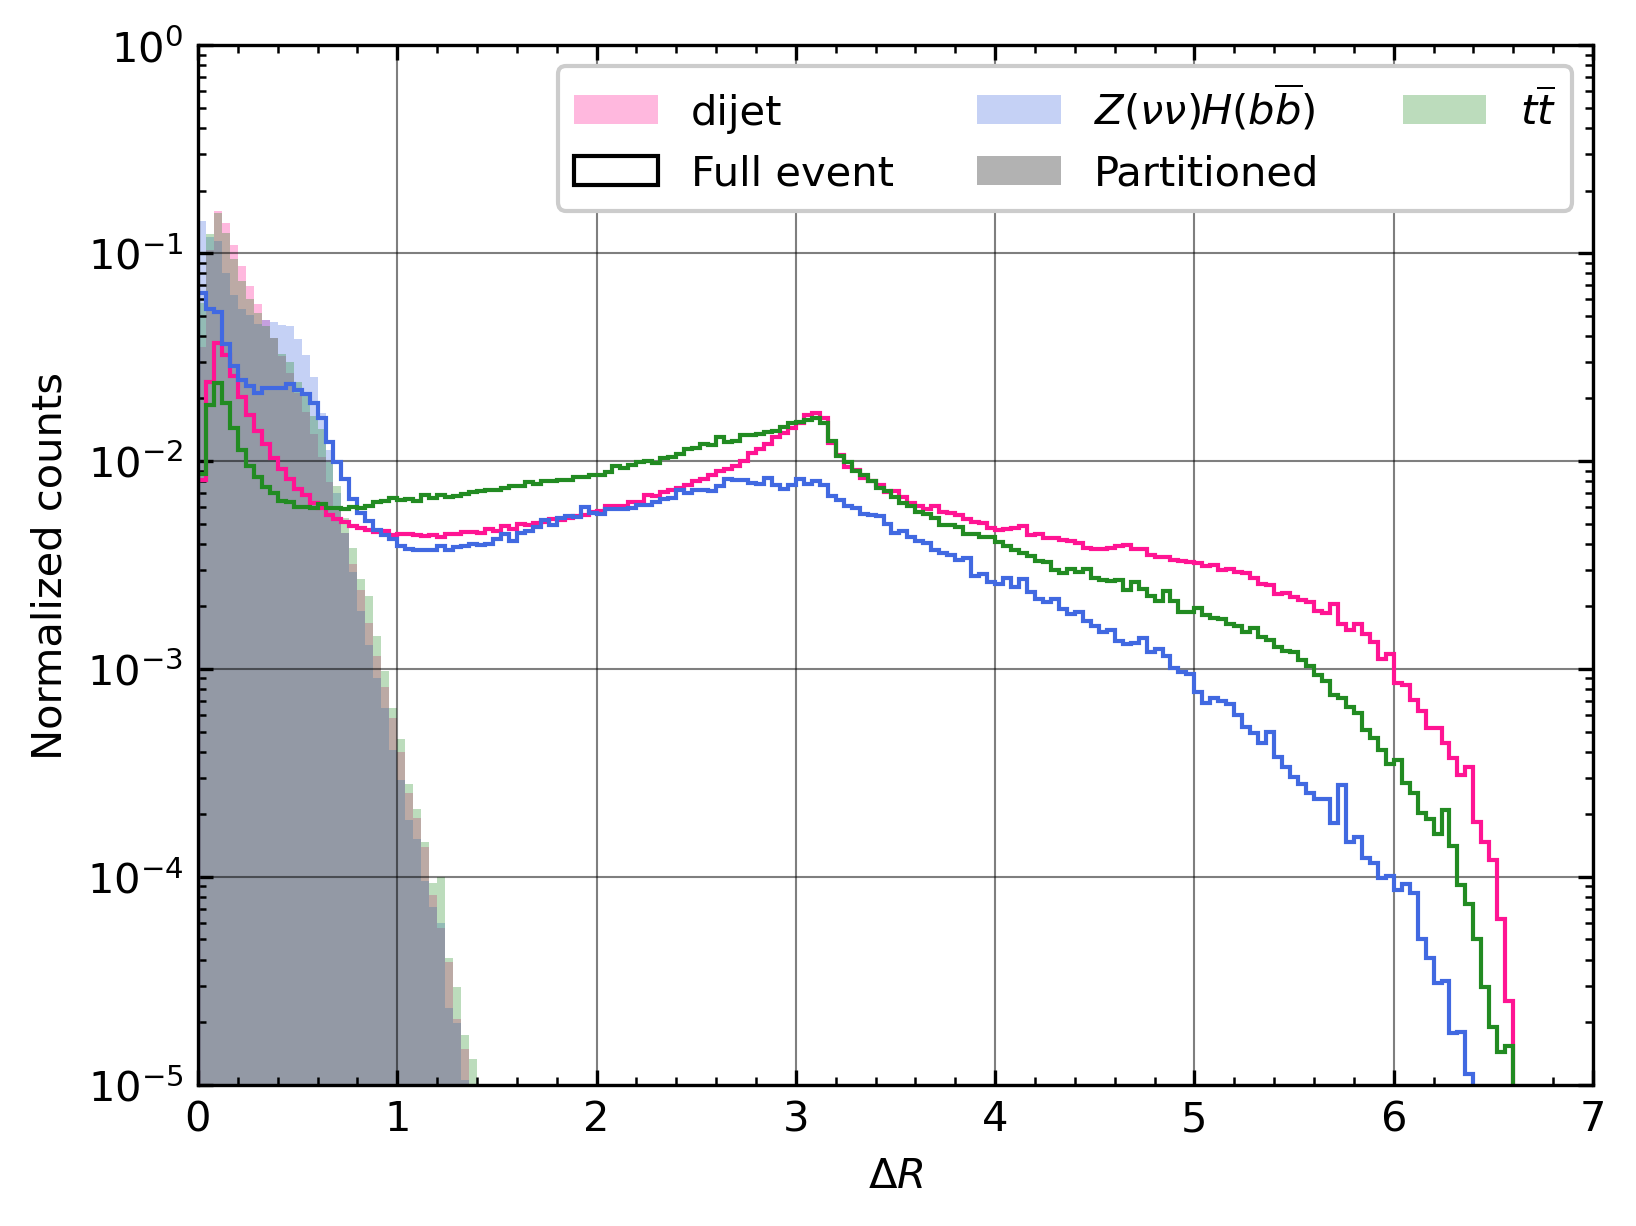

In [48]:
plot_hist(correlation_hist_path_dict, "h_topo_to_topo_dR_weighted", r"$\Delta R$", f_rebin=50, normalize=True, title=None, xlim=(0,7))
if SAVE_FIG:
    plt.savefig(f'{save_dir}/dR_topo_to_topo.pdf', bbox_inches='tight')

# Particle to particle (no reweighting)

dijet
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
dijet_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ZHbb
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ZHbb_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ttbar
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']
ttbar_part
['h_topo_to_topo_dR;1', 'h_topo_to_topo_dR_weighted;1', 'h_part_to_part_dR;1', 'h_part_to_part_dR_weighted;1']


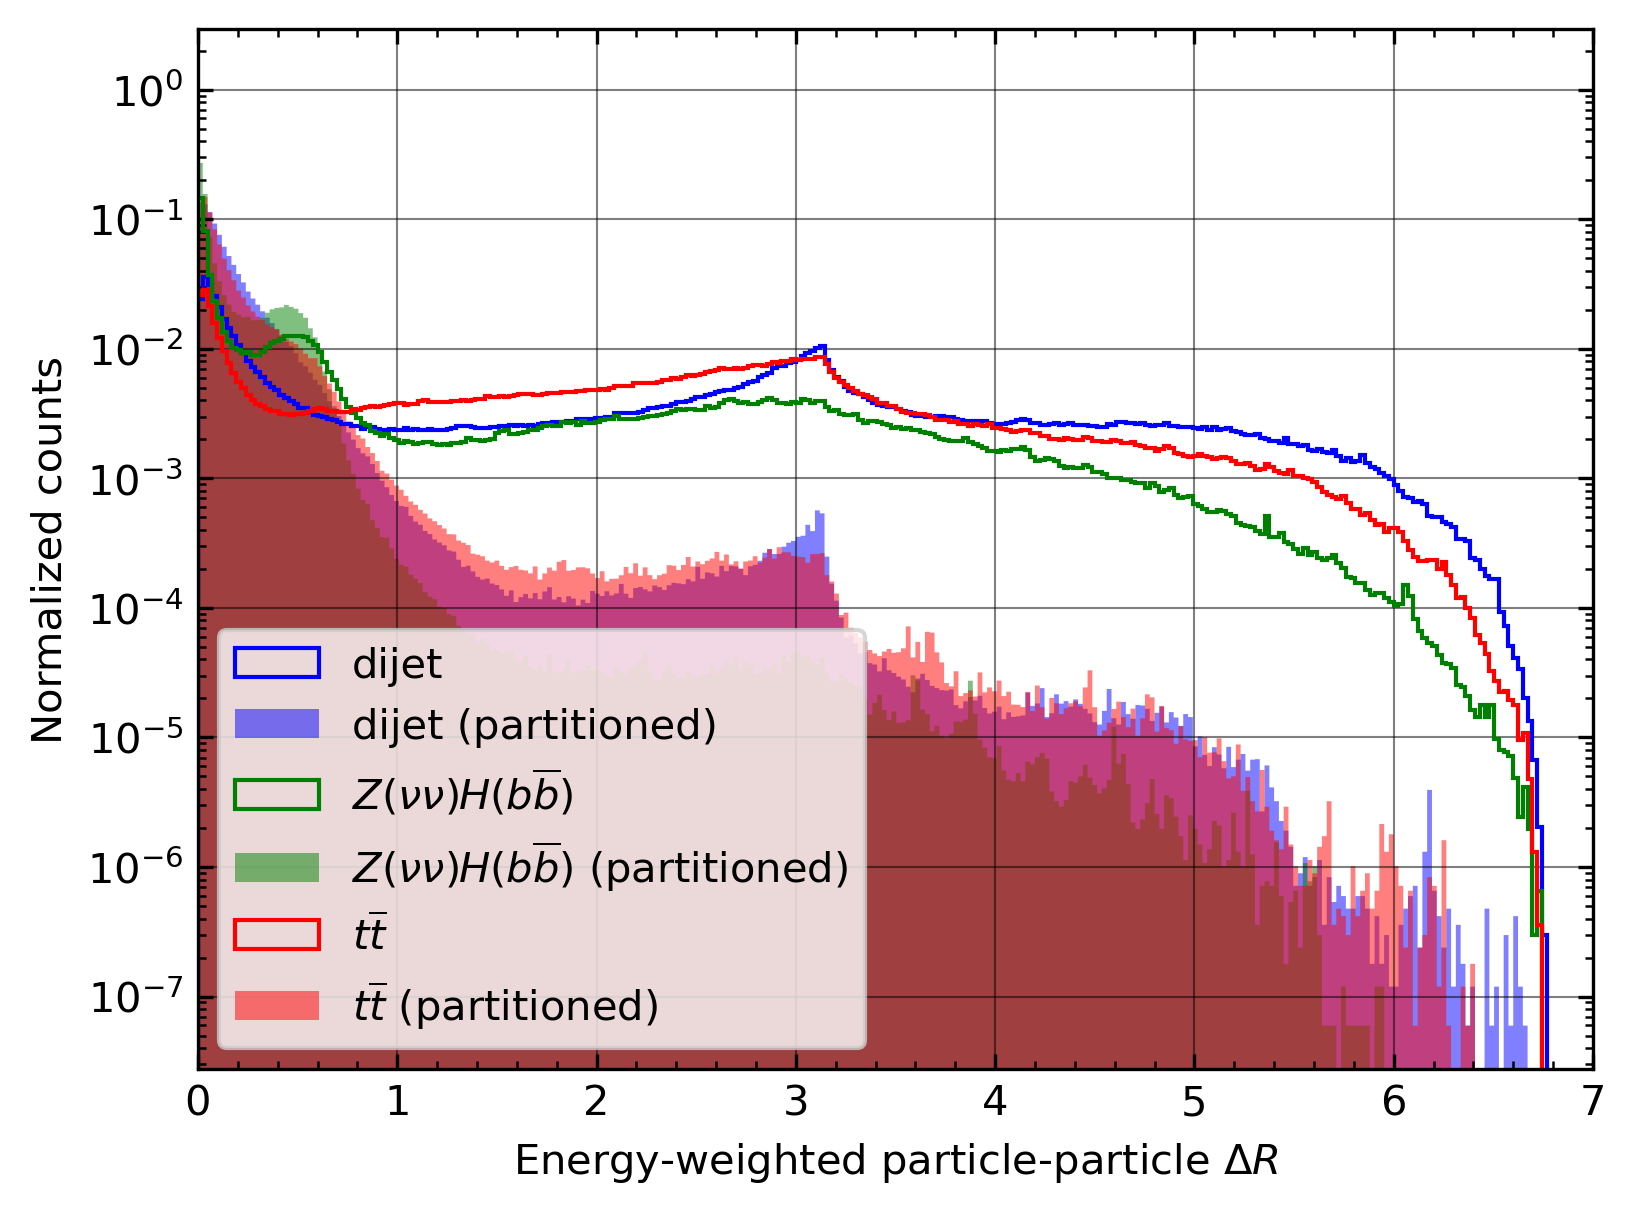

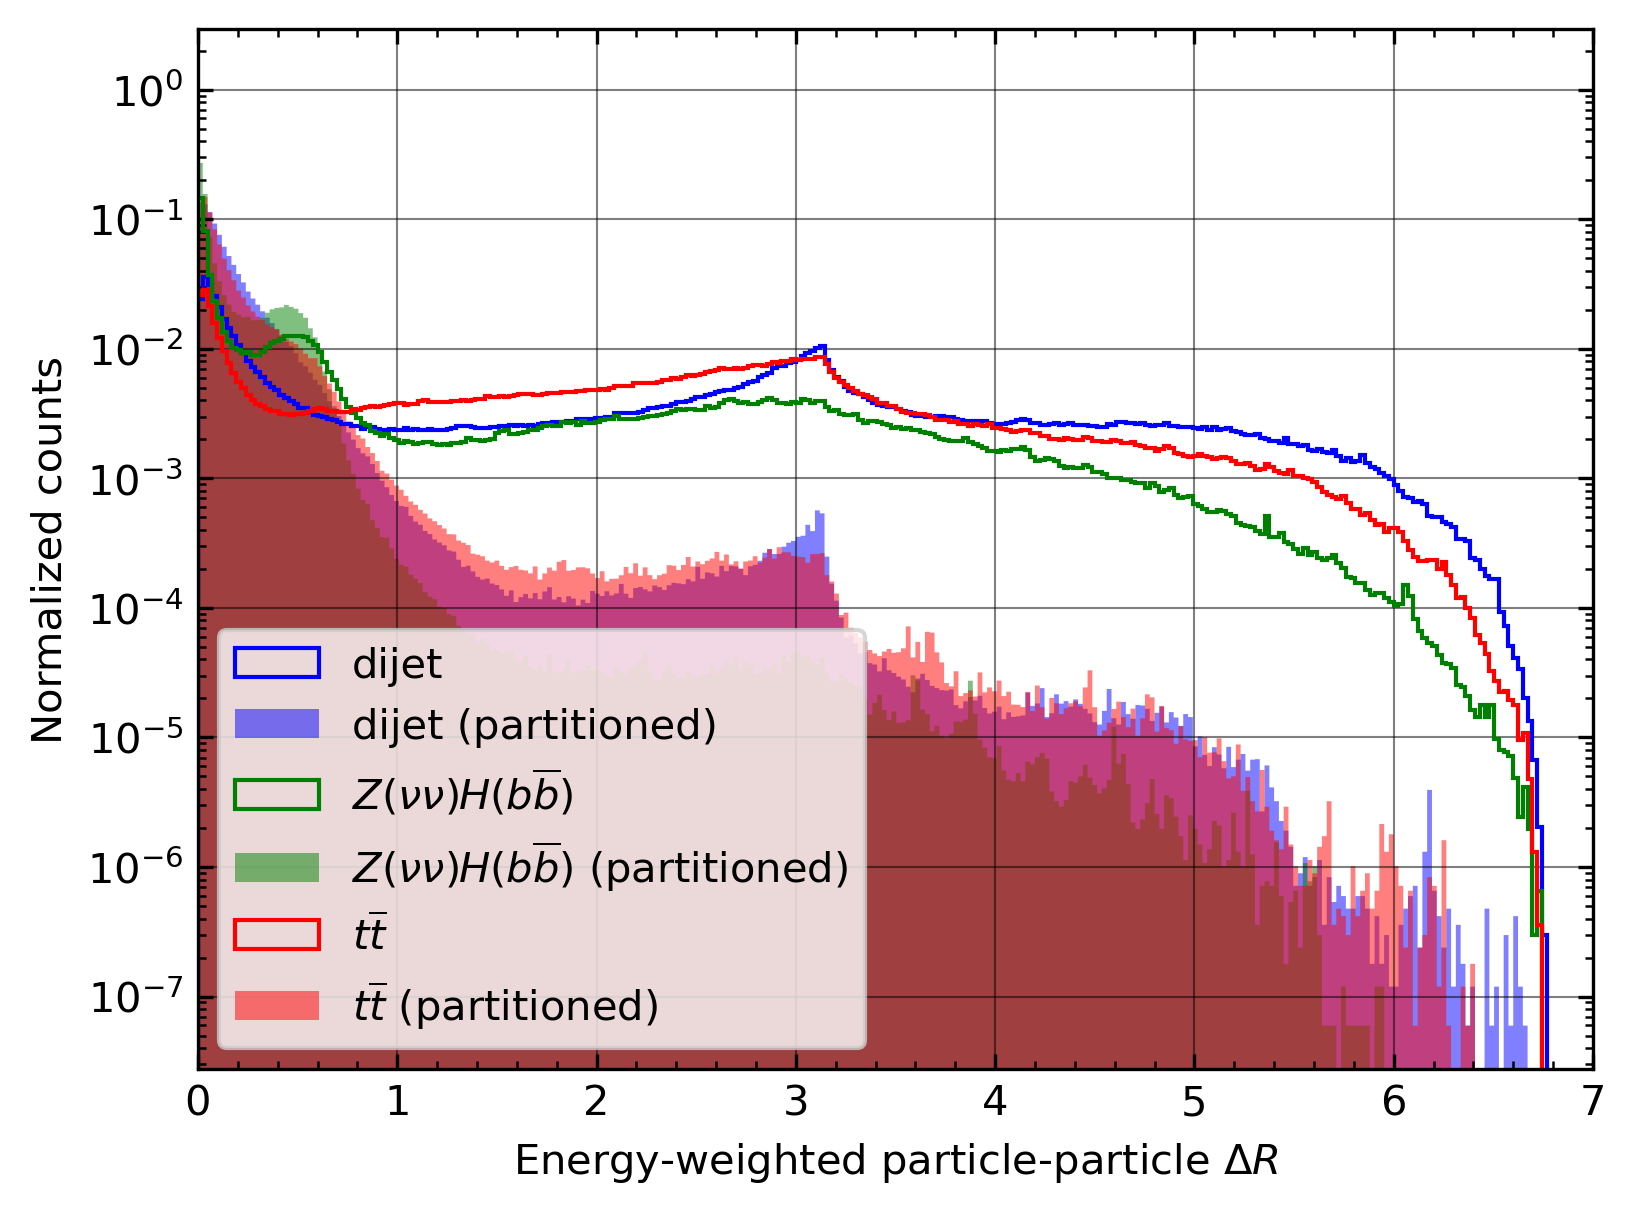

In [9]:
plot_hist(correlation_hist_path_dict, "h_part_to_part_dR_weighted", r"Energy-weighted particle-particle $\Delta R$", f_rebin=30, normalize=True, xlim=(0,7))